In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LeastSquares():
    def __init__(self, filename, indepCols=5):
        data = self.readData(filename)
        self.n = len(data)
        self.X = data[:,:indepCols]
        self.y = data[:,indepCols]
        
    def getIndependentData(self):
        return self.X
    
    def getDependentData(self):
        return self.y
    
    def run(self):  
        XtX = np.dot(self.X.transpose(), self.X)
        Xty = np.dot(self.X.transpose(), self.y)
        XtX_inv = np.linalg.inv(XtX)
        
        # b = (XtX)^-1 Xty
        b = np.dot(XtX_inv, Xty)
        
        # e = ||y - Xb|| / n , where n is the number of data rows
        e = np.linalg.norm(self.y - self.X.dot(b)) / self.n
        
        return b,e
              
    def readData(self, filename):
        data = np.genfromtxt(filename, delimiter = ' ')
        return data
    
    # f(b) = yTy - 2yTXb + bXtXb
    def fitness(self, b):
        yTy = np.dot(self.y.transpose(), self.y)
        yTXb = np.dot(np.dot(self.y.transpose(), self.X), b)
        bXtXb = np.dot(np.dot(np.dot(b, self.X.transpose()), self.X), b)
        
        return yTy - 2*yTXb + bXtXb


b = [ 2.00245467  4.00306647  3.0036716  -2.00704016 -1.00089932]
e = 0.13406531952181847

Value	| Approximation
--------|--------------------
304.84	| 302.1533249410727
-168.82	| -171.86435422975998
196.37	| 193.79740992245948
-296.75	| -300.2031716401362
55.59	| 52.49960672171336
-32.72	| -35.801167897336015
-159.87	| -163.10641856666567
95.62	| 92.79207872220525
-32.61	| -35.87127712090928
1.65	| -1.4273447261460035


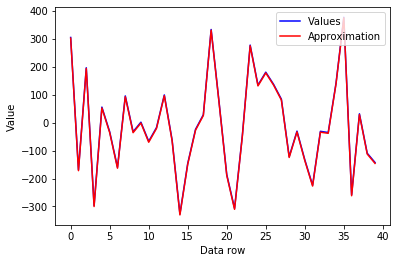

In [4]:
def printTable(data, n):
    for i in range(n):
        if(i == 0):
            print("\nValue\t| Approximation")
            print("--------|--------------------")
        print(str(data[i][0]) + "\t| " + str(data[i][1]))

ls = LeastSquares("data.txt")
b,e = ls.run()
actualValues = ls.getDependentData()
approximations = ls.getIndependentData().dot(b)

print("b =", b)
print("e =", e)


dataComparison = [[actualValues[i], approximations[i]] for i in range(len(actualValues))]
printTable(dataComparison, 10)
                 
plt.plot(actualValues[:40], label="Values", color="b")
plt.plot(approximations[:40], label="Approximation", color="r")
plt.xlabel("Data row")
plt.ylabel("Value")
plt.legend()
plt.show()